In [1]:
# %load imports.py
%load_ext autoreload
%autoreload 2
%reload_kedro
%config Completer.use_jedi = False  ## (To fix autocomplete)

import pandas as pd
from src.models.vmm import ModelSimulator
import matplotlib.pyplot as plt
from src.visualization.plot import track_plots, plot, captive_plot
import kedro
import numpy as np
import os.path
import anyconfig

import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,4)

from myst_nb import glue
from src.symbols import *
import src.symbols as symbols
from src.system_equations import *

from IPython.display import display, Math, Latex, Markdown
from sympy.physics.vector.printing import vpprint, vlatex

from src.parameters import df_parameters
p = df_parameters["symbol"]

# Read configs:
conf_path = os.path.join("../../conf/base/")
runs_globals_path = os.path.join(
    conf_path,
    "runs_globals.yml",
)

runs_globals = anyconfig.load(runs_globals_path)
model_test_ids = runs_globals["model_test_ids"]

join_globals_path = os.path.join(
    conf_path,
    "join_globals.yml",
)

joins = runs_globals["joins"]
join_runs_dict = anyconfig.load(join_globals_path)

globals_path = os.path.join(
    conf_path,
    "globals.yml",
)
global_variables = anyconfig.load(globals_path)



vmms = global_variables["vmms"]
only_joined = global_variables[
    "only_joined"
]  # (regress/predict with only models from joined runs)S

2022-02-08 13:23:14,819 - kedro.framework.session.store - INFO - `read()` not implemented for `SQLiteStore`. Assuming empty store.
2022-02-08 13:23:17,357 - root - INFO - ** Kedro project wPCC_pipeline
2022-02-08 13:23:17,358 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-02-08 13:23:17,367 - root - INFO - Registered line magic `run_viz`


### Acceleration accuracy

In [2]:
regression = "motion_regression"

df_rmse = pd.DataFrame() 

for vmm in vmms:
    
    for join in joins:
    
        for id in model_test_ids:

            rmse = catalog.load(f"{ vmm }.{ regression }.{ join }.{ id }.online_prediction_rmse")
            
            
            rmse["vmm"] = vmm
            rmse["join"] = join
            rmse["model_test_id"] = id
            df_rmse = df_rmse.append(rmse, ignore_index=True)
            
            
            

2022-02-08 13:23:18,580 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22611.online_prediction_rmse` (JSONDataSet)...
2022-02-08 13:23:18,584 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22612.online_prediction_rmse` (JSONDataSet)...
2022-02-08 13:23:18,589 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22613.online_prediction_rmse` (JSONDataSet)...
2022-02-08 13:23:18,594 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22614.online_prediction_rmse` (JSONDataSet)...
2022-02-08 13:23:18,597 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22615.online_prediction_rmse` (JSONDataSet)...
2022-02-08 13:23:18,602 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22616.online_prediction_rmse` (JSONDataSet)...
2022-02-08 13:23:18,606 - kedro.io

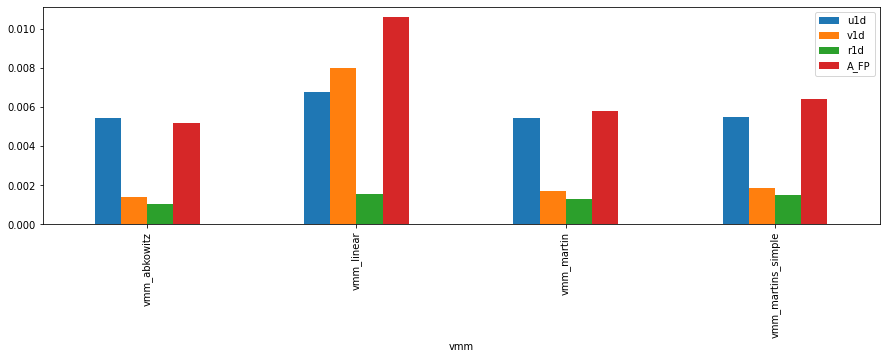

In [3]:
fig,ax=plt.subplots()
df_rmse.groupby(by=['join']).get_group('joined').groupby(by=['vmm']).mean().plot.bar(ax=ax);

glue("fig_x_dot_rmse", fig, display=False)

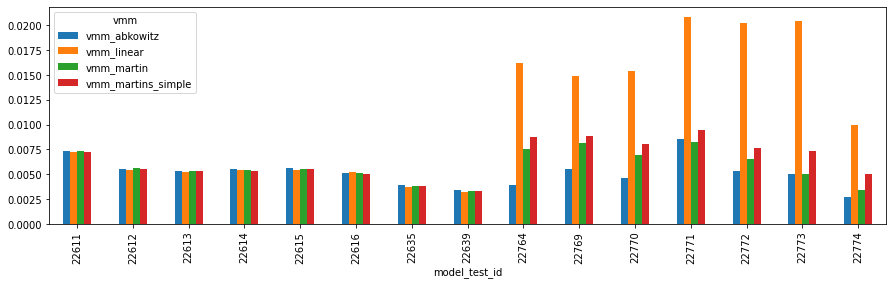

In [4]:
df_compare = df_rmse.groupby(by=['join']).get_group('joined').copy()
fig,ax=plt.subplots()
df_compare.pivot(index='model_test_id', columns='vmm').plot.bar(y='A_FP', ax=ax);
glue("fig_A_FP_rmse", fig, display=False)

The root mean square error (RMSE) of the acceleration errors are shown for all the VMM:s in Fig.{ref}`fig_x_dot_rmse`.

```{glue:figure} fig_x_dot_rmse
:figwidth: 1000px
:name: "fig_x_dot_rmse"

RMSE of the acceleration errors for all the VMM:s
```

This figure is also showing $A_{FP}$ which is an attempt to express a total error of all the three DOF:s as:

$$ A_{FP}^2 = \dot{u}^2 + \left(|\dot{v}| + \frac{L_{pp}|\dot{r}|}{2} \right)^2 $$

```{glue:figure} fig_A_FP_rmse
:figwidth: 1000px
:name: "fig_A_FP_rmse"

RMSE of the total acceleration errors for all model tests and VMM:s
```